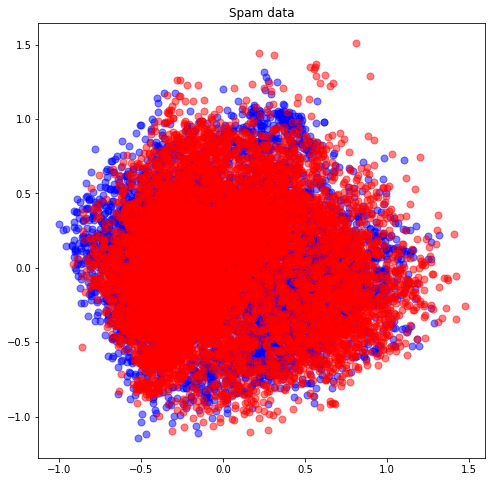

             precision    recall  f1-score   support

        0.0    0.55678   0.84161   0.67019      2033
        1.0    0.95389   0.83024   0.88778      8023

avg / total    0.87361   0.83254   0.84379     10056
final score    0.75534   0.83593   0.77899     10056



In [110]:
import argparse
import numpy as np
import matplotlib.pyplot as pl


# Import the random forest package
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.decomposition import PCA

__author__ = 'gulinvladimir'

def main(features_percent = 0.9, trees = 10):
    train_data = np.loadtxt('spam.train.txt')
    test_data  = np.loadtxt('spam.test.txt')

    total_data = np.concatenate(([train_data, test_data]), axis=0)

    visualize_data(total_data[0::, 1::], len(train_data[:,0]), len(test_data[:,0]))

    number_of_features = len(train_data[0, :]) - 1

    use_features_in_tree = (int)(features_percent * number_of_features)

    # Create the random forest object which will include all the parameters
    # for the fit
    forest = RandomForestClassifier(n_estimators=trees, max_features=use_features_in_tree)

    # Fit the training data to the Survived labels and create the decision trees
    forest = forest.fit(train_data[0::, 1::], train_data[0::, 0])

    # Take the same decision trees and run it on the test data
    prediction = forest.predict(test_data[0::, 1::])

    print(classification_report(test_data[0::, 0], prediction))


def visualize_data(total_data, train_size, test_size):
    ''' Visualization of total spam data
    :param total_data: Train and test data
    :param train_size: Size of train set
    :param test_size: Size of test set
    :return:
    '''
    pca = PCA(n_components=2)
    projection = pca.fit_transform(total_data)

    fig = pl.figure(figsize=(8, 8))

    pl.rcParams['legend.fontsize'] = 10
    pl.plot(projection[0:train_size, 0], projection[0:train_size, 1],
            'o', markersize=7, color='blue', alpha=0.5, label='Train')
    pl.plot(projection[train_size:train_size+test_size, 0], projection[train_size:train_size+test_size, 1],
            'o', markersize=7, color='red', alpha=0.5, label='Test')
    pl.title('Spam data')
    pl.show()


def classification_report(y_true, y_pred):
    ''' Computes clasification metrics

    :param y_true - original class label
    :param y_pred - predicted class label
    :return presicion, recall for each class; micro_f1 measure, macro_f1 measure
    '''
    last_line_heading = 'avg / total'
    final_line_heading = 'final score'

    labels = unique_labels(y_true, y_pred)

    width = len(last_line_heading)
    target_names = ['{0}'.format(l) for l in labels]

    headers = ["precision", "recall", "f1-score", "support"]
    fmt = '%% %ds' % width  # first column: class name
    fmt += '  '
    fmt += ' '.join(['% 9s' for _ in headers])
    fmt += '\n'

    headers = [""] + headers
    report = fmt % tuple(headers)
    report += '\n'

    p, r, f1, s = precision_recall_fscore_support(y_true, y_pred,
                                                  labels=labels,
                                                  average=None)

    f1_macro = 0
    precision_macro = 0
    recall_macro = 0

    for i, label in enumerate(labels):
        values = [target_names[i]]
        f1_macro += f1[i]
        precision_macro += p[i]
        recall_macro += r[i]
        for v in (p[i], r[i], f1[i]):
            values += ["{0:0.5f}".format(v)]
        values += ["{0}".format(s[i])]
        report += fmt % tuple(values)

    report += '\n'

    # compute averages
    values = [last_line_heading]
    for v in (np.average(p, weights=s),
              np.average(r, weights=s),
              np.average(f1, weights=s)):
        values += ["{0:0.5f}".format(v)]
    values += ['{0}'.format(np.sum(s))]
    report += fmt % tuple(values)

    values = [final_line_heading]
    for v in (precision_macro, recall_macro, f1_macro):
        values += ["{0:0.5f}".format(v / labels.size)]
    values += ['{0}'.format(np.sum(s))]
    report += fmt % tuple(values)

    return report

if __name__ == "__main__":
    main()

In [115]:
# svm
from sklearn import svm

train_data = np.loadtxt('spam.train.txt')
test_data  = np.loadtxt('spam.test.txt')

clf = svm.SVC()
clf.fit(train_data[:,1:], train_data[:,0])

print(classification_report(y_true,clf.predict(test_data[:,1:])))

             precision    recall  f1-score   support

        0.0    0.76980   0.97541   0.86049      2033
        1.0    0.99332   0.92609   0.95852      8023

avg / total    0.94813   0.93606   0.93870     10056
final score    0.88156   0.95075   0.90951     10056



In [119]:
# logreg
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing


clf = LogisticRegression(random_state=0)
scaler = preprocessing.StandardScaler().fit(train_data[:,1:])
clf.fit(scaler.transform(train_data[:,1:]), train_data[:,0])

print(classification_report(y_true,clf.predict(scaler.transform(test_data[:,1:]))))

             precision    recall  f1-score   support

        0.0    0.69147   0.94147   0.79733      2033
        1.0    0.98367   0.89356   0.93645      8023

avg / total    0.92460   0.90324   0.90833     10056
final score    0.83757   0.91751   0.86689     10056



In [120]:
def pred_tree(features_percent, trees):
    number_of_features = len(train_data[0, :]) - 1

    use_features_in_tree = (int)(features_percent * number_of_features)

    # Create the random forest object which will include all the parameters
    # for the fit
    forest = RandomForestClassifier(n_estimators=trees, max_features=use_features_in_tree)

    # Fit the training data to the Survived labels and create the decision trees
    forest = forest.fit(train_data[0::, 1::], train_data[0::, 0])

    # Take the same decision trees and run it on the test data
    prediction = forest.predict(test_data[0::, 1::])
    
    return prediction

In [124]:
# rf
print(classification_report(test_data[0::, 0],pred_tree(0.6,150)))

             precision    recall  f1-score   support

        0.0    0.79407   0.89523   0.84162      2033
        1.0    0.97257   0.94117   0.95661      8023

avg / total    0.93648   0.93188   0.93336     10056
final score    0.88332   0.91820   0.89911     10056



***RF показывает результат соизмеримый с svm и значительно лучше logreg. Скорее всего, если увеличить число деревье, то качество возрастёт ещё сильнее. Однако по скорости RF очень сильно проигрывает***

In [71]:
import argparse
import numpy as np
import matplotlib.pyplot as pl


# Import the random forest package
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

data = []
for features_percent in [0.6,0.7,0.8,0.9]:
    for trees in [10,20,30,40,50,60]:

        train_data = np.loadtxt('spam.train.txt')
        test_data  = np.loadtxt('spam.test.txt')
        
        prediction = pred_tree(features_percent,trees)
        
        y_true,y_pred = test_data[0::, 0], prediction

        f = f1_score(y_true,y_pred,average='micro')
        data.append((features_percent,trees,f))
        

In [72]:
X = [x[0] for x in data]
Y = [x[1] for x in data]
Z = [x[2] for x in data]

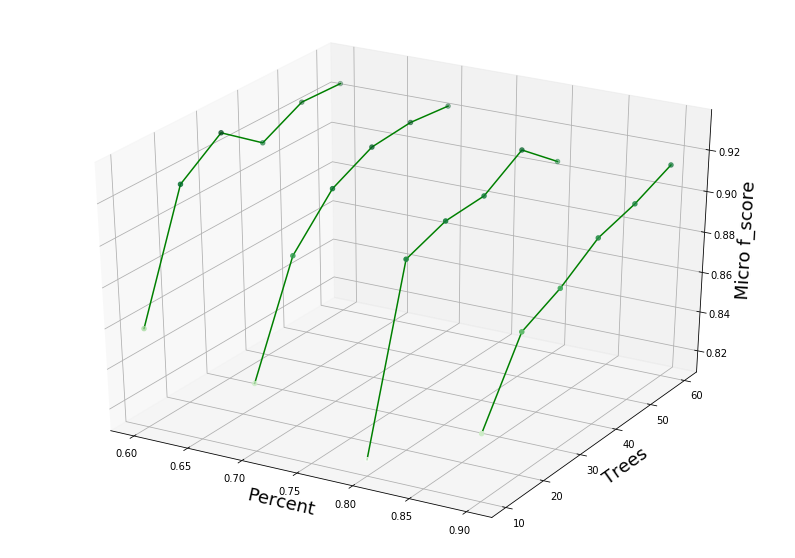

In [97]:
from mpl_toolkits import mplot3d


fig = pl.figure(figsize=(14,10))
ax = pl.axes(projection='3d')
ax.set_xlabel('Percent',fontsize=18)
ax.set_ylabel('Trees',fontsize=18) 
ax.set_zlabel('Micro f_score',fontsize=18)
for i in range(len(X)//6):
    ax.plot3D(X[i*6:(i+1)*6], Y[i*6:(i+1)*6], Z[i*6:(i+1)*6], 'green')
ax.scatter3D(X, Y, Z, c=Z, cmap='Greens');

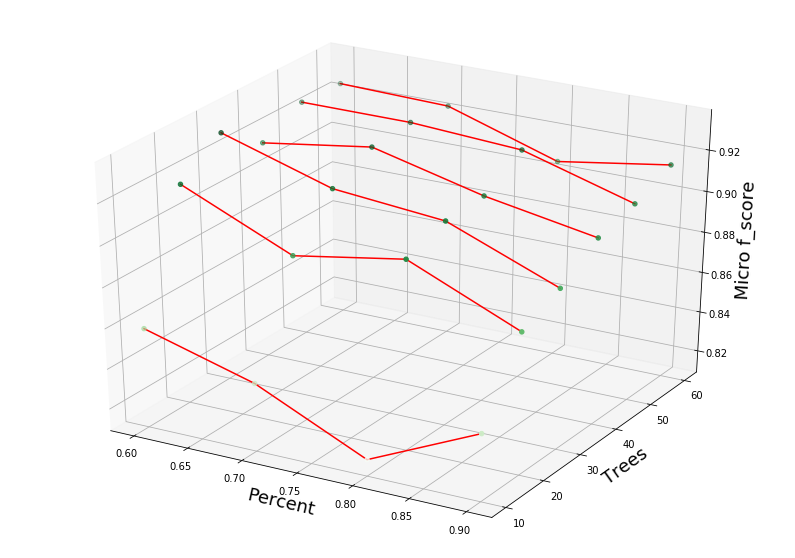

In [96]:
fig = pl.figure(figsize=(14,10))
ax = pl.axes(projection='3d')
ax.set_xlabel('Percent',fontsize=18)
ax.set_ylabel('Trees',fontsize=18) 
ax.set_zlabel('Micro f_score',fontsize=18)
for i in range(6):
    ax.plot3D(X[i::6], Y[i::6], Z[i::6], 'red')
ax.scatter3D(X, Y, Z, c=Z, cmap='Greens');

In [82]:
#лучшие параметры
max(data,key=lambda x:x[1])

(0.6, 60, 0.9248210023866349)

***В целом видно, что чем больше деревьев и меньше процент, тем лучше качество. Оба этих параметра помогают бороться с переобучением***

***Почему качество классификации для класса spam выше, чем для класса notspam?***

***1) В обучающей выборке больше спама, поэтому модель чаще видела спамовые примеры<br>2) Вероятно среди спама есть множество лёгких примеров (аномалии, которые на рисунке сверху далеко от центра находятся), поэтому модель может их без труда классифицировать***